# **TikTok Project**


Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.



# **Exploratory data analysis**

In this activity, examine data provided and prepare it for analysis. Also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

 The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**


1. Identify any outliers:





*   What methods are best for identifying outliers?
  * Use numpy functions to investigate the `mean()` and `median()` of the data and understand range of data values
  * Use a boxplot to visualize the distribution of the data
*   How do you make the decision to keep or exclude outliers from any future models?
  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis, according to what your goals are for the model you are planning to construct. To help you make the decision
      * Delete them: If one is sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then it's more likely to decide to delete outliers. Of the three choices.
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, one is more likely to choose a path of deriving new values to replace the outlier values.
      * Leave them: For a dataset that one plan to do EDA/analysis on and nothing else, or for a dataset is preparing for a model that is resistant to outliers, it is most likely that they are going to leave them in.



### **Task 1. Imports, links, and loading**



In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**



### **Task 2: Data exploration and cleaning**



In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size


232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



- The visualizations most helpful for considering the distribution of the data include box plots and histograms. 

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**



### **Task 3. Build visualizations**



#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

Text(0.5, 1.0, 'video_duration_sec')

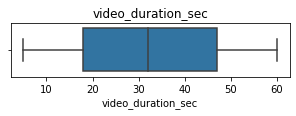

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_duration_sec'])
plt.title('video_duration_sec')

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video duration Histogram')

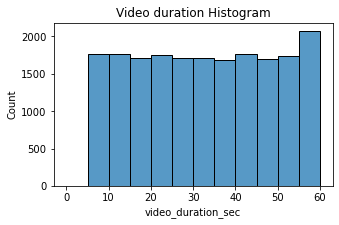

In [9]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration Histogram')

**Question:** What do you notice about the duration and distribution of the videos?
-  All videos are 5-60 seconds in length, and the distribution is uniform.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

Text(0.5, 1.0, 'video_view_count')

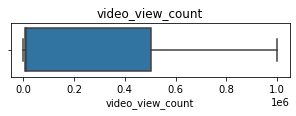

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_view_count'])
plt.title('video_view_count')

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

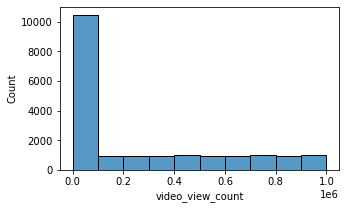

In [15]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))

**Question:** What do you notice about the distribution of this variable?
- This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

Text(0.5, 1.0, 'video_like_count')

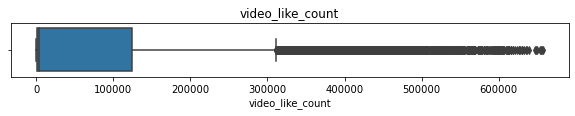

In [17]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
sns.boxplot(x=data['video_like_count'])
plt.title('video_like_count')

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

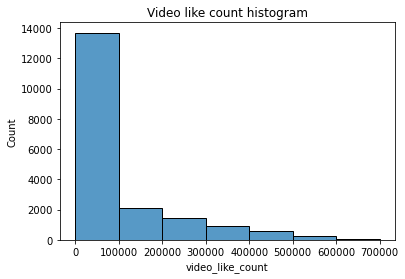

In [30]:
# Create a histogram
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))

plt.title('Video like count histogram');

**Question:** What do you notice about the distribution of this variable?
- Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

Text(0.5, 1.0, 'video_comment_count')

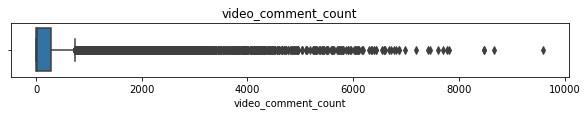

In [32]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10,1))
sns.boxplot(x= data['video_comment_count'])
plt.title('video_comment_count')

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

<Figure size 360x216 with 0 Axes>

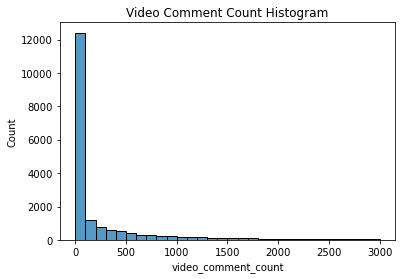

<Figure size 360x216 with 0 Axes>

In [35]:
# Create a histogram
sns.histplot(data['video_comment_count'], bins=range(0,3001,100))
plt.title('Video Comment Count Histogram')
plt.figure(figsize=(5,3))

**Question:** What do you notice about the distribution of this variable?
-  Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

Text(0.5, 1.0, 'video_share_count')

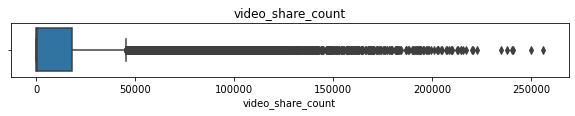

In [37]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize= (10,1))
sns.boxplot(x=data['video_share_count'])
plt.title('video_share_count')

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Share Histogram')

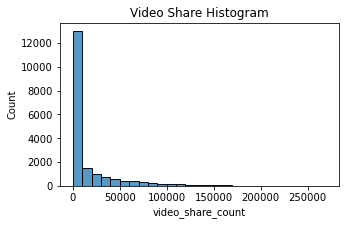

In [39]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins= range(0,270001,10000))
plt.title('Video Share Histogram')

**Question:** What do you notice about the distribution of this variable?
- The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.


#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

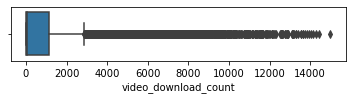

In [41]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(6,1))
sns.boxplot(x= data['video_download_count'])

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

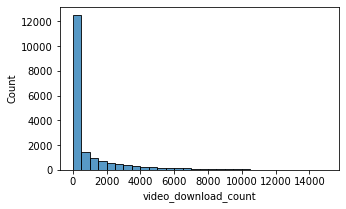

In [43]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins= range(0,(15001),500))

**Question:** What do you notice about the distribution of this variable?
- The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

Text(0.5, 1.0, 'Claim by Verification Status Histogram')

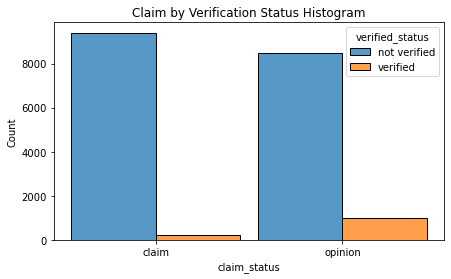

In [45]:
# Create a histogram
plt.figure(figsize=(7,4))
sns.histplot(data=data,
            x= 'claim_status',
            hue='verified_status',
            multiple='dodge',
            shrink=0.9)
plt.title('Claim by Verification Status Histogram')

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?
- There are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.

#### **Claim status by author ban status**


Text(0.5, 1.0, 'Claim Status by Author Ban Status- Count')

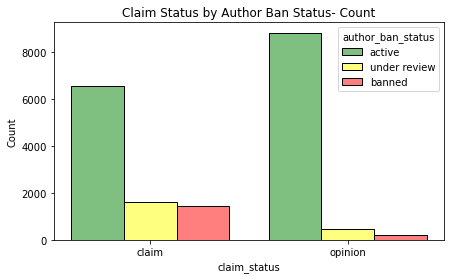

In [46]:
# Create a histogram
plt.figure(figsize= (7,4))
sns.histplot(data, x= 'claim_status', hue= 'author_ban_status',
            multiple= 'dodge',
            hue_order= ['active', 'under review', 'banned'],
            shrink= 0.8,
            palette={'active':'green', 'under review':'yellow', 'banned':'red'},
            alpha=0.5)
plt.title('Claim Status by Author Ban Status- Count')

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?
- For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

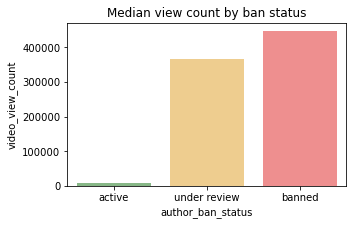

In [58]:
# Create a bar plot
fig = plt.figure(figsize=(5,3))
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()


sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?
- The median view counts for non-active authors are many times greater than the median view count for active authors. Since we know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

- Indeed, a quick check of the median view count by claim status bears out this assessment:

In [59]:
# Calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

Text(0.5, 1.0, 'Total Views by Video Claim Status')

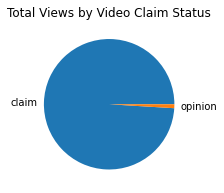

In [60]:
# Create a pie graph
plt.figure(figsize= (3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total Views by Video Claim Status')

**Question:** What do you notice about the overall view count for claim status?
- The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **Task 4. Determine outliers**

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis I've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

I've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if used the 3rd quartile.


In [65]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

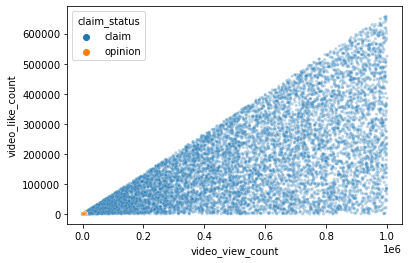

In [67]:
# Create a scatterplot of `video_like_count` versus `video_view_count` according to 'claim_status'
sns.scatterplot(x= data['video_view_count'], y= data['video_like_count'],
               hue= data['claim_status'],
               s=10, alpha=0.3)
plt.show()

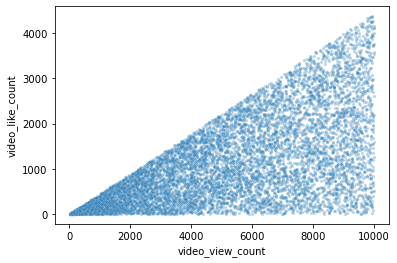

In [68]:
# Create a scatterplot of `video_like_count` versus `video_view_count` for opinions only
opinion= data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion['video_view_count'], y=opinion['video_like_count'],
               s=10, alpha=0.3)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**



### **Task 5. Conclusion**



EDA is important because ...

* *EDA helps to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*
